<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diddier Cofré</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudantía
## 1.1 Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


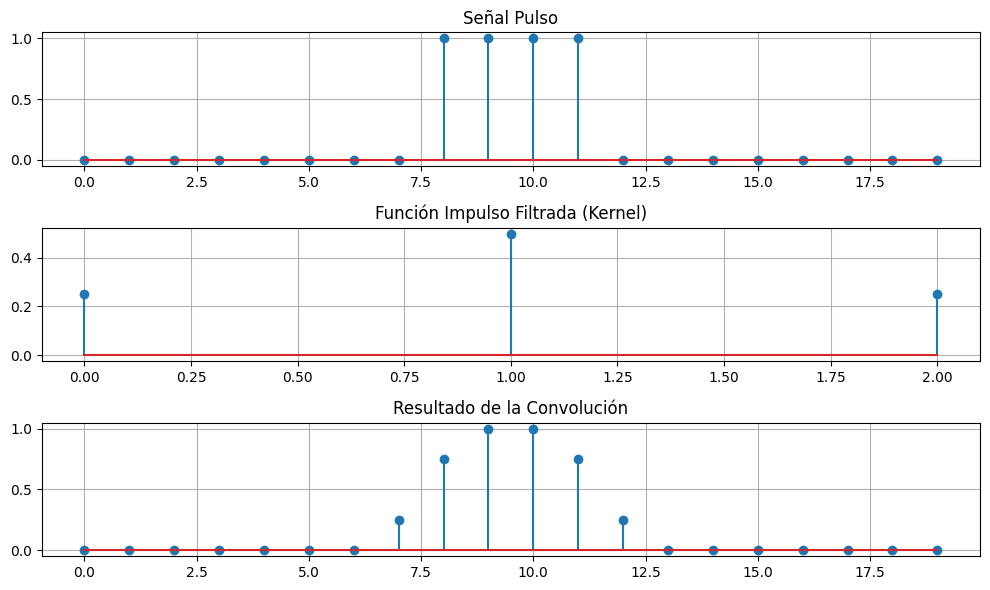

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Señal Pulso: un vector con unos en el medio
pulso = np.zeros(20)
pulso[8:12] = 1  # pulso de duración 4 en el centro

# Función impulso filtrada
kernel = np.array([0.25, 0.5, 0.25])  # Filtro suavizador

# Realizamos la convolución
resultado = np.convolve(pulso, kernel, mode='same')

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.stem(pulso)
plt.title('Señal Pulso')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(kernel)
plt.title('Función Impulso Filtrada (Kernel)')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(resultado)
plt.title('Resultado de la Convolución')
plt.grid()

plt.tight_layout()
plt.show()


## 1.2 Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


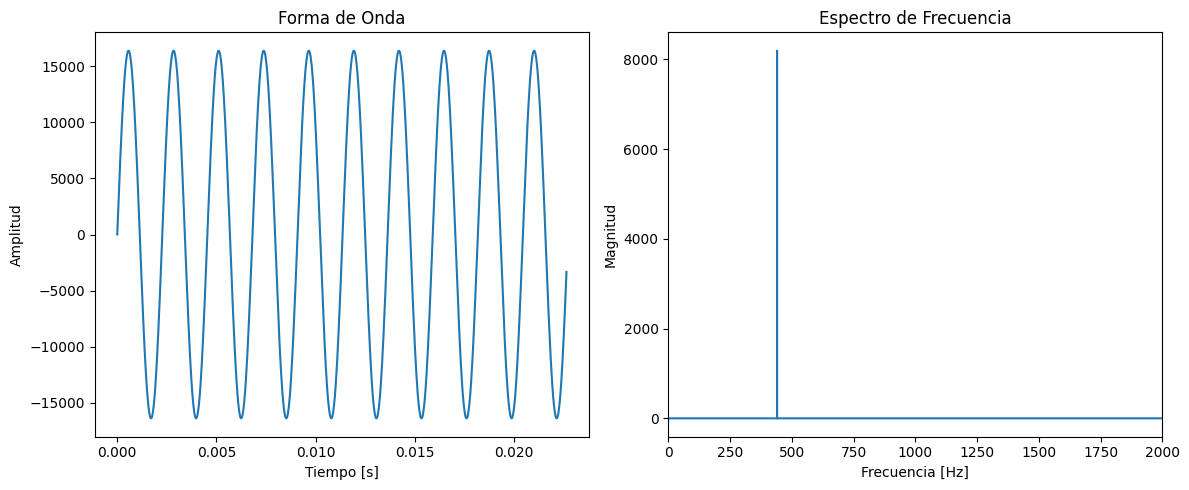

Frecuencias presentes en el espectro (mayores a umbral):
Frecuencia: 440.00 Hz - Magnitud: 8191.4325


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

# Leer el archivo de audio
fs, data = read("senal_senoidal.wav")

# Crear eje de tiempo
t = np.linspace(0, len(data)/fs, num=len(data))

# Graficar forma de onda
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:1000], data[:1000])  # Mostrar solo una parte para claridad
plt.title("Forma de Onda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# FFT
N = len(data)
fft_result = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(N, d=1/fs)
magnitude = np.abs(fft_result[:N//2]) / N
frequencies = fft_freqs[:N//2]

# Graficar espectro
plt.subplot(1, 2, 2)
plt.plot(frequencies, magnitude)
plt.title("Espectro de Frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0, 2000)  # hasta 2000 Hz para mejor visualización

plt.tight_layout()
plt.show()

# Mostrar frecuencias con magnitud significativa
threshold = 100 # Umbral
print("Frecuencias presentes en el espectro (mayores a umbral):")
for f, mag in zip(frequencies, magnitude):
    if mag > threshold:
        print(f"Frecuencia: {f:.2f} Hz - Magnitud: {mag:.4f}")


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


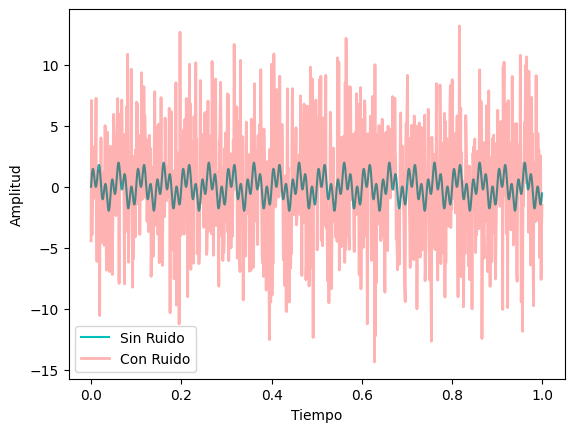

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Crear señal con dos frecuencias
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*20*t) + np.sin(2*np.pi*70*t)
f_sin_ruido = f
f_con_ruido = f + 4.5*np.random.randn(len(t))

plt.plot(t, f_sin_ruido, color='c', linewidth=1.5 , label='Sin Ruido')
plt.plot(t, f_con_ruido, color='r', alpha=0.3, linewidth=2 , label='Con Ruido')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()


In [55]:
# Valor medio de la señal con ruido
valor_medio = np.mean(f_con_ruido)
print("Valor medio de la señal con ruido:", valor_medio)

Valor medio de la señal con ruido: 0.12717834348670548


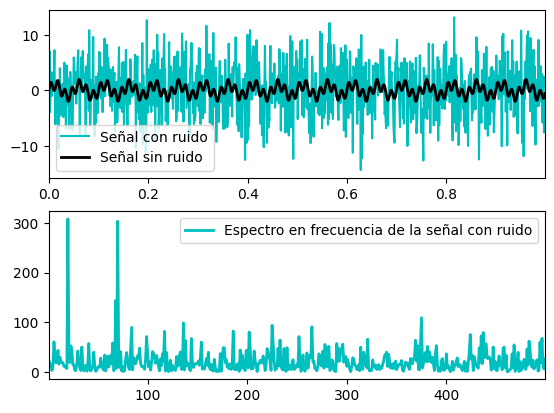

In [63]:
# Transformada rapida de Fourier (fft)

n = len(t)
fhat = np.fft.fft(f_con_ruido, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

# Crear dos subplots
fig, axs = plt.subplots(2, 1)

# Primer subplot: señal en el dominio del tiempo
plt.sca(axs[0])
plt.plot(t, f_con_ruido, color='c', linewidth=1.5, label='Señal con ruido')
plt.plot(t, f_sin_ruido, color='k', linewidth=2, label='Señal sin ruido')
plt.xlim(t[0], t[-1])
plt.legend()

# Segundo subplot: espectro de frecuencia
plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Espectro en frecuencia de la señal con ruido')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()



In [64]:
# Usar el PSD para filtrar el ruido
indices = PSD > 130                        # Encontrar frecuencias con alta potencia
PSDclean = PSD * indices                  # Mantener solo esas componentes
fhat = indices * fhat                     # Anular coeficientes de Fourier pequeños
ffilt = np.fft.ifft(fhat)                 # Inversa FFT para obtener señal filtrada


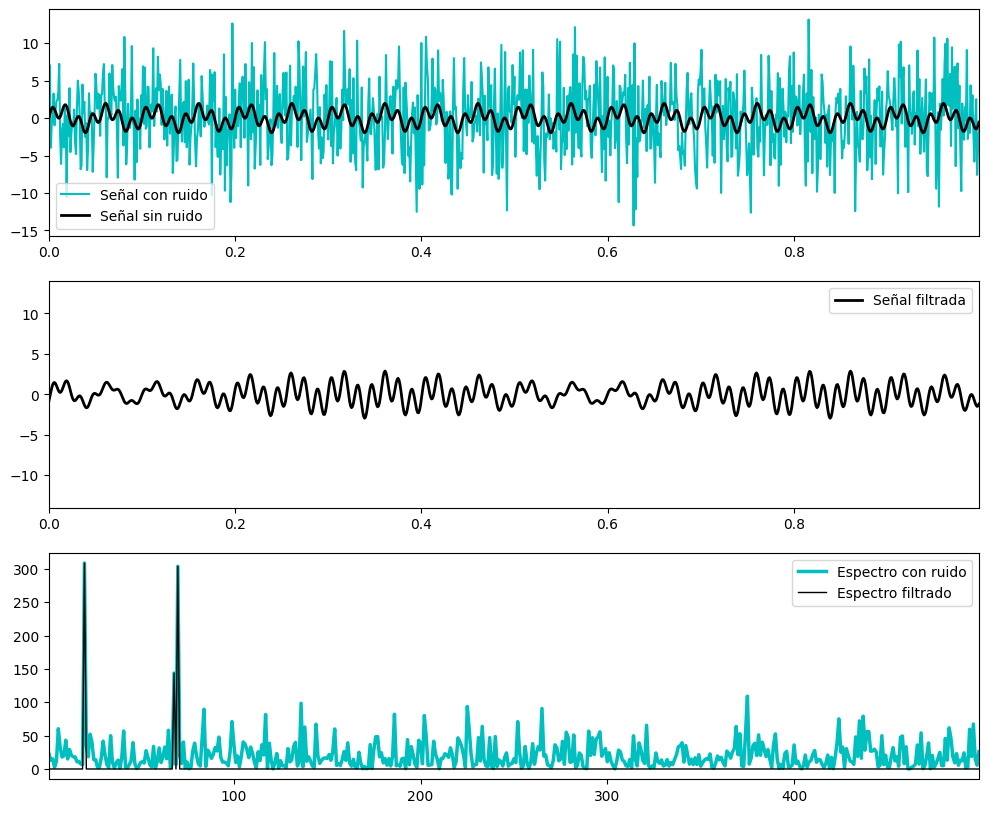

In [65]:
# Plots
fig, axs = plt.subplots(3, 1,figsize=(12, 10))

# Señal ruidosa y limpia
plt.sca(axs[0])
plt.plot(t, f_con_ruido, color='c', linewidth=1.5, label='Señal con ruido')
plt.plot(t, f_sin_ruido, color='k', linewidth=2, label='Señal sin ruido')
plt.xlim(t[0], t[-1])
plt.legend()

# Señal filtrada en el dominio del tiempo
plt.sca(axs[1])
plt.plot(t, ffilt, color='k', linewidth=2, label='Señal filtrada')
plt.xlim(t[0], t[-1])
plt.ylim(-14,14)
plt.legend()

# Espectro original vs. filtrado
plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', linewidth=2.5, label='Espectro con ruido')
plt.plot(freq[L], PSDclean[L], color='k', linewidth=1, label='Espectro filtrado')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


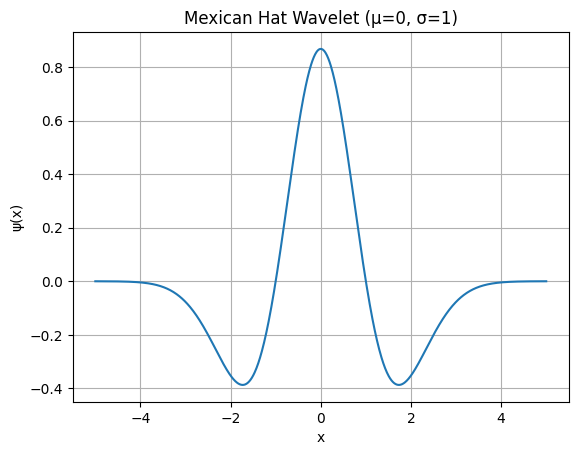

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sigma = 1  # Controla el ancho de la campana
mu = 0     # Controla el desplazamiento horizontal

# Definimos la función Mexican Hat Wavelet
def mexican_hat(x, mu, sigma):
    coef = 2 / (np.sqrt(3 * sigma) * np.pi**0.25)
    return coef * (1 - ((x - mu)**2) / (sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Dominio de la función
x = np.linspace(-5, 5, 1000)

# Evaluamos la wavelet
y = mexican_hat(x, mu, sigma)

# Graficamos
plt.plot(x, y)
plt.title(f"Mexican Hat Wavelet (μ={mu}, σ={sigma})")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.grid(True)
plt.show()


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar la sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

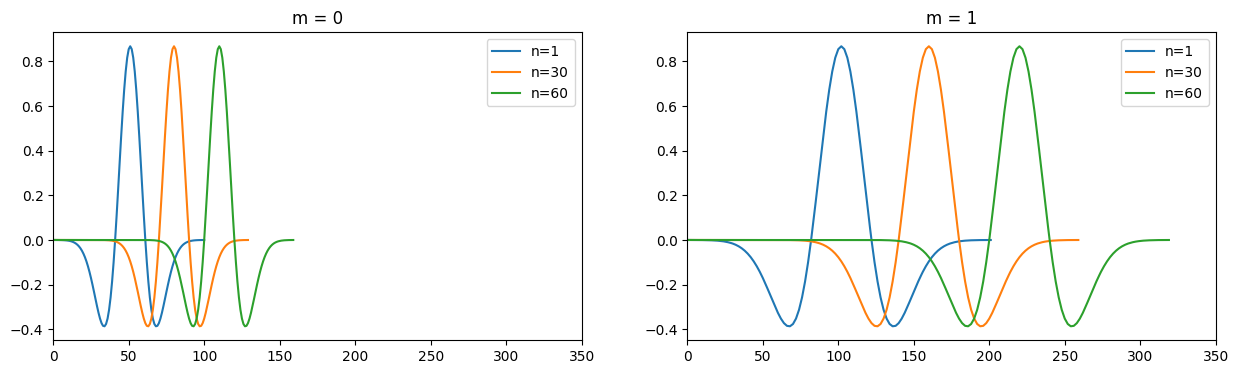

In [67]:
# Recibe una wavelet madre psi (Mexican Hat) y genera una wavelet hija escalada y desplazada
def psi_mn(psi, m, n):
    a = 2**m # Factor de escalamiento
    b = n*2**m # Factor de desplazamiento
    wav = np.zeros(len(psi)*a + b) # Creamos un vector que va a contener la wavelet escalada y desplazada
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi) # Se inserta la wavelet interpolandola en el vector vacio creado anteriormente
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1) # Se crea la wavelet madre Mexican Hat (Función ya definida anteriormente)
xlim = (0,350)
ns = [1, 30, 60] # Se eligen 3 valores de desplazamientos
ms = [0, 1] # Se eligen 2 valores de escalamientos
plt.figure(figsize=(15,4))
plt.subplot(121)

# Para cada valor de escalamiento m, se crea un subplot
for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
# Dentro de cada subplot, se grafican las wavelets hijas con diferentes desplazamientos n
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show() # Se observa cómo cambia la forma y posición de la wavelet al modificar m y n.

# Explicación del código:
# Este código implementa y visualiza versiones escaladas y desplazadas de una wavelet madre (en este caso, la Mexican Hat)
# para observar cómo cambian sus formas con distintos parámetros de escalamiento m y desplazamiento n. Estas versiones
# escaladas y desplazadas vendrían a ser las wavelets hijas.

### 3.2.2 completa el siguiente código para realizar la transformada


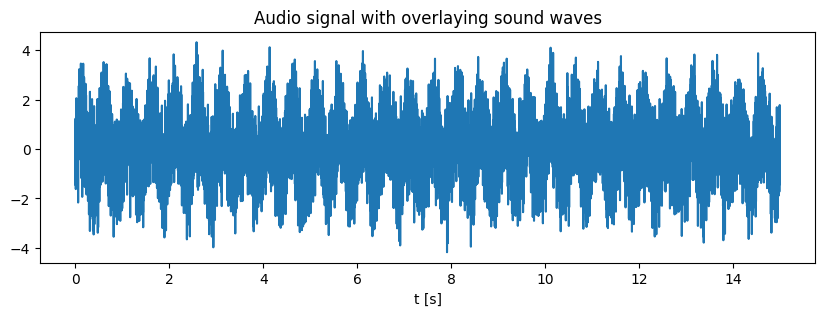

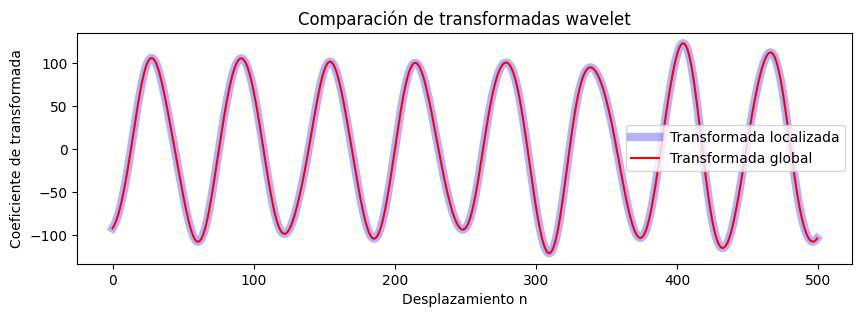

In [68]:
"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    wav = psi_mn(psi, m, n)
    min_len = min(len(f), len(wav))  # evitar overflow
    f_scaled = f[:min_len]
    wav_scaled = wav[:min_len]
    transform_scaled = np.sum(f_scaled * wav_scaled)
    return transform_scaled

"""Naive Transform adding over the whole length"""
def twav_mn_naive(f, psi, m, n):
    wav = psi_mn(psi, m, n)
    # Igualamos longitud con padding si hace falta
    if len(wav) < len(f):
        wav = np.pad(wav, (0, len(f) - len(wav)))
    elif len(wav) > len(f):
        f = np.pad(f, (0, len(wav) - len(f)))
    transform = np.sum(f * wav)
    return transform

# Parámetros
m = 3 # single value for m
ns = np.arange(1000,1500)
res = 1000 # resolution
freq = 2 # frequency

"""Creating a wave to analyse"""
x = np.arange(0,15000,1)
noise = np.random.normal(0,1, len(x))
audio = np.sin(np.arange(15000)*2*np.pi*freq/res) + noise

# Aplicación de la transformada
transformed_sweept = [twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept = [twav_mn_naive(audio, psi, m, n) for n in ns]


# Gráfica de la señal ruidosa
plt.figure(figsize=(10, 3))
plt.plot(np.arange(len(audio), dtype="float32")/res, audio)
plt.xlabel("t [s]")
plt.title("Audio signal with overlaying sound waves")
plt.show()

# Gráfica de resultados de las transformadas
plt.figure(figsize=(10, 3))
plt.plot(transformed_sweept, color="blue", lw=6, alpha=0.3, label="Transformada localizada")
plt.plot(naive_transformed_sweept, "r-", label="Transformada global")
plt.xlabel("Desplazamiento n")
plt.ylabel("Coeficiente de transformada")
plt.title("Comparación de transformadas wavelet")
plt.legend()
plt.show()


### 3.3 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

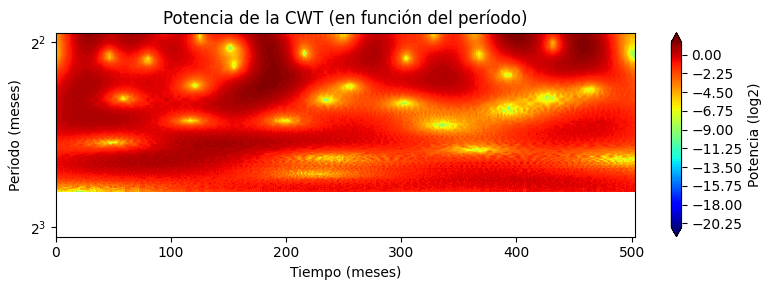

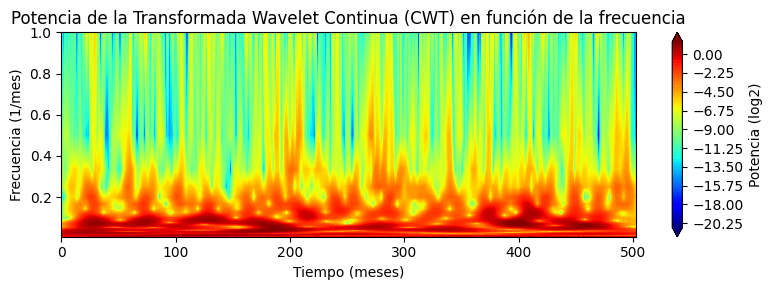

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import requests
from io import StringIO
import re

# Descargar los datos
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
response = requests.get(url)
data_str = response.text

# Filtrar solo las líneas que contienen datos numéricos
lines = data_str.strip().split('\n')
numeric_lines = [line for line in lines if re.match(r"^\s*-?\d", line)]
data_clean = "\n".join(numeric_lines)

# Leer datos en una sola columna
data = pd.read_csv(StringIO(data_clean), sep='\s+', header=None)
anomalies = data.iloc[:, 0].values  # Solo una columna

# Crear eje de tiempo
time = np.arange(len(anomalies))
dt = 1  # 1 mes entre muestras

# Transformada wavelet continua
scales = np.arange(1, 128)
wavelet = 'cmor1.5-1.0'
coefficients, frequencies = pywt.cwt(anomalies, scales, wavelet, sampling_period=dt)

# Potencia
power = np.abs(coefficients) ** 2
period = 1 / frequencies

# Gráfico: periodo
plt.figure(figsize=(8, 3))
plt.contourf(time, np.log2(period), np.log2(power), levels=100, extend='both', cmap='jet')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Período (meses)')
plt.title('Potencia de la CWT (en función del período)')
plt.yscale('log', base=2)
plt.colorbar(label='Potencia (log2)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico: frecuencia
plt.figure(figsize=(8, 3))
plt.contourf(time, frequencies, np.log2(power), levels=100, extend='both', cmap='jet')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Frecuencia (1/mes)')
plt.title('Potencia de la Transformada Wavelet Continua (CWT) en función de la frecuencia')
plt.colorbar(label='Potencia (log2)')
plt.tight_layout()
plt.show()


### 3.4 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El código anterior, descarga los datos del fenomeno del Niño, registrados en un periodo aproximado de 40 años, por meses. Luego limpia y extrae los datos de las anomalias. Después se aplica una transformada wavelet continua para ver cómo cambia el contenido de frecuencia a lo largo del tiempo. Luego obtiene la potencia, y se grafica en dos formas: usando período y usando frecuencia.

Lo que se puede identificar en los graficos obtenidos, son resultados logicos con el comportamiento esperado de este fenómeno. Vemos oscilaciones con periodos entre 2 y 5 años (24 a 120 meses). Vemos que la energia tiene un comportamiento no estacionario, es decir que no es constante, el fenomeno va apareciendo y desapareciendo, y variando en intensidad, como es de esperar. También vemos que hay mayor potencia en periodos mas largos de tiempo, que muestra que los cambios en el desarrollo de este fenomeno se produce en periodos de tiempo mas largos, no a corto plazo.

## 4. Obtén el espectrograma de tu señal de audio
Sobre la señal de audio en el punto 1 de la actividad, debe presentar el espectragrama


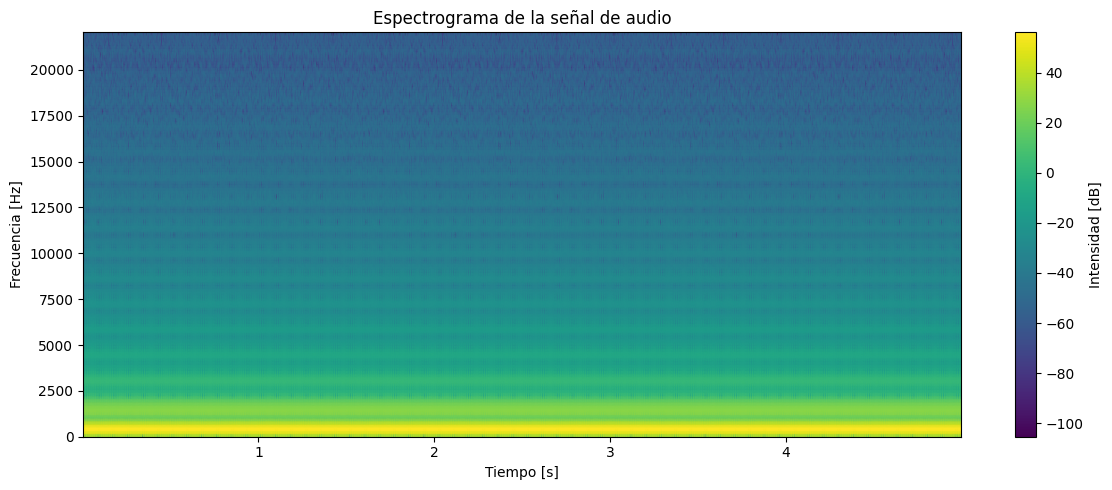

In [74]:
from scipy.signal import spectrogram

fs, data = read("senal_senoidal.wav")

if data.ndim > 1:
    data = data[:, 0]  # Tomar solo un canal (mono)

data = data.astype(float)  # Asegúrate de que sea tipo float para procesarlo

# Calcular el espectrograma
f, t_spec, Sxx = spectrogram(data, fs)

# Graficar el espectrograma
plt.figure(figsize=(12, 5))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Espectrograma de la señal de audio")
plt.ylabel("Frecuencia [Hz]")
plt.xlabel("Tiempo [s]")
plt.colorbar(label="Intensidad [dB]")
plt.tight_layout()
plt.show()


## 5. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

<center><img src="../../assets/slices.png"/></center>


Número total de slices generados: 100


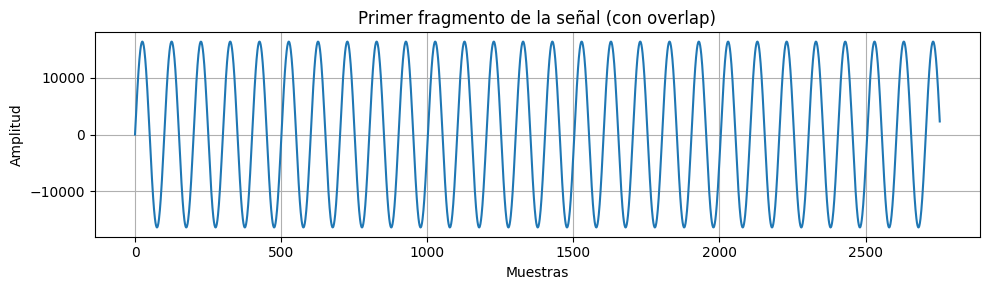

In [75]:
# Función que fragmenta una señal de audio en slices con overlaps.
def slice_signal(signal, fs, slice_duration_sec, overlap_samples):
    slice_samples = int(slice_duration_sec * fs)  # duración del slice sin overlap en muestras
    total_len = len(signal)

    slices = []
    start = 0

    while start < total_len:
        # inicio y fin del fragmento con solapamiento
        slice_start = max(0, start - overlap_samples)
        slice_end = min(total_len, start + slice_samples + overlap_samples)

        fragment = signal[slice_start:slice_end]
        slices.append(fragment)

        start += slice_samples  # avanzar sin contar el solapamiento

    print(f"Número total de slices generados: {len(slices)}")
    return slices

# Parámetros
slice_duration_sec = 0.05         # cada fragmento dura 0.5 segundos
overlap_samples = 550           # solapamiento de 550 muestras a cada lado (25%)

# Cortar la señal
slices = slice_signal(data, fs, slice_duration_sec, overlap_samples)

# Graficar el primer slice como ejemplo
plt.figure(figsize=(10, 3))
plt.plot(slices[0])
plt.title("Primer fragmento de la señal (con overlap)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


Forma del tensor de slices: torch.Size([100, 3305])


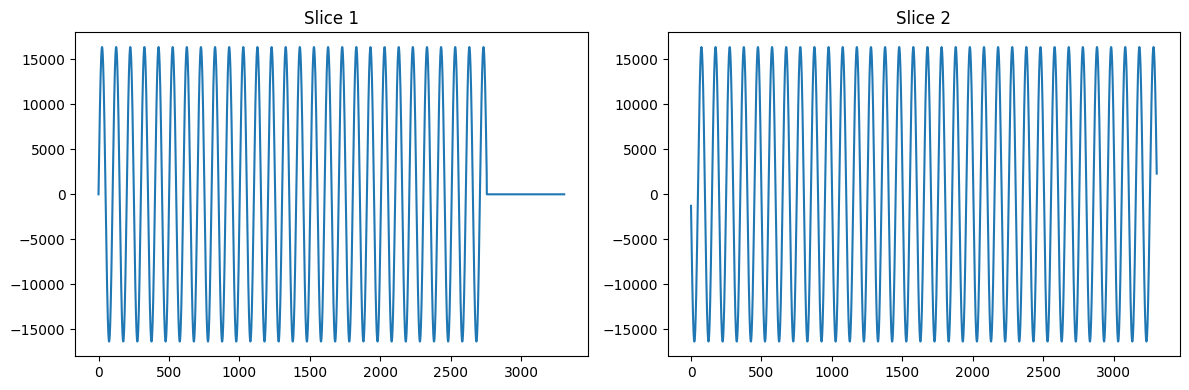

Reproduciendo Slice 1:


Reproduciendo Slice 2:


In [76]:
import torch
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence
from IPython.display import Audio

# Parámetros
fs = 44100 # Frecuencia de muestreo
slice_duration_sec = 0.05 # Duración de cada slice
overlap_samples = 550 # Overlap
slice_samples = int(slice_duration_sec * fs)

# Convertir señal a tensor de PyTorch
signal_tensor = torch.from_numpy(data).float()
total_len = signal_tensor.shape[0]

# Slicing con overlap
slices_list = []
start = 0

while start < total_len:
    slice_start = max(0, start - overlap_samples)
    slice_end = min(total_len, start + slice_samples + overlap_samples)

    fragment = signal_tensor[slice_start:slice_end]
    slices_list.append(fragment)

    start += slice_samples  # avanzar sin contar overlap

# Convertir a tensor 2D con padding
slices_tensor = pad_sequence(slices_list, batch_first=True)
print(f"Forma del tensor de slices: {slices_tensor.shape}")  # [Numero de slices, Numero de muestras del slice mas largo]

# Graficar los primeros 2 slices
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(slices_tensor[0].numpy())
plt.title("Slice 1")
plt.subplot(1, 2, 2)
plt.plot(slices_tensor[1].numpy())
plt.title("Slice 2")
plt.tight_layout()
plt.show()

# Reproducir audio de los dos primeros slices
print("Reproduciendo Slice 1:")
display(Audio(slices_list[0].numpy(), rate=fs))

print("Reproduciendo Slice 2:")
display(Audio(slices_list[1].numpy(), rate=fs))


# *Se generaron 100 fragmentos, cada uno con 3305 muestras.*

## 6. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio, para diferentes ordenes y niveles de rizado.
Muestra gráficos con las diferentes respuestas del filtro butterworth y explica el resultado.

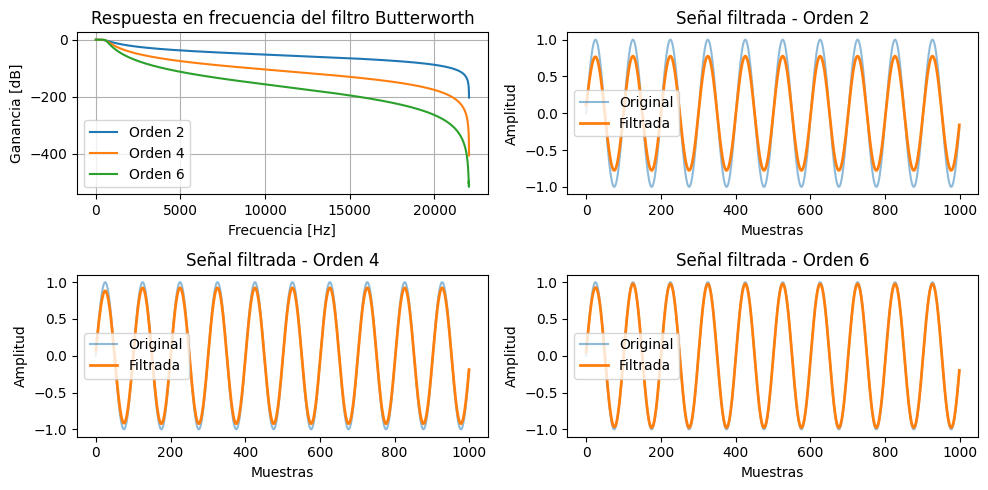

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.signal import butter, filtfilt, freqz

# Leer señal de audio
fs, data = read("senal_senoidal.wav")
if data.ndim > 1:
    data = data[:, 0]  # Convertir a mono si es estéreo

# Normalizar señal
data = data / np.max(np.abs(data))

# Parámetros del filtro
cutoff = 600  # Frecuencia de corte en Hz
normalized_cutoff = cutoff / (fs / 2)  # Normalización por Nyquist
orders = [2, 4, 6]  # Distintos órdenes del filtro

plt.figure(figsize=(10, 5))

# Aplicar y graficar para diferentes órdenes
for i, order in enumerate(orders):
    # Diseño del filtro Butterworth pasa bajos
    b, a = butter(order, normalized_cutoff, btype='low', analog=False)

    # Respuesta en frecuencia
    w, h = freqz(b, a, worN=8000)
    plt.subplot(2, 2, 1)
    plt.plot((fs * 0.5 / np.pi) * w, 20 * np.log10(abs(h)), label=f'Orden {order}')

    # Aplicar filtro a la señal
    filtered = filtfilt(b, a, data)

    # Graficar señal filtrada
    plt.subplot(2, 2, i+2)
    plt.plot(data[:1000], label='Original', alpha=0.5)
    plt.plot(filtered[:1000], label='Filtrada', linewidth=2)
    plt.title(f'Señal filtrada - Orden {order}')
    plt.legend()
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")

# Configuración de la respuesta en frecuencia
plt.subplot(2, 2, 1)
plt.title('Respuesta en frecuencia del filtro Butterworth')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ganancia [dB]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



## 7. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
